### <font color='red'>1.</font> 匯入影像處理套件

In [29]:
# cv2 用來讀取圖片及相關處理
import cv2
import numpy as np
import matplotlib.pyplot as plt

# PIL 用來把文字畫在圖片中
from PIL import Image, ImageDraw, ImageFont

### <font color='red'>2.</font> 設置讀取圖片的方法函數: <font color='blue'>read_image</font>
輸入值：圖片檔名 string  
輸出值：圖片 ndarray (120, 100)

In [30]:
# 設定圖檔路徑
ORI_IMG_DIR = 'data/sub_img'

# 讀取指定檔名的圖片
def read_image(fileName):
    # 讀取圖片並轉為灰階
    img = cv2.imread(f'{ORI_IMG_DIR}/{fileName}', 0)
    
    # 將圖片轉為 120 x 100 的大小
    img = cv2.resize(img, (120, 100), interpolation=cv2.INTER_CUBIC)
    return img

### <font color='red'>3.</font> 設置產生文字圖片的方法函數:  <font color='blue'>text_image</font>
輸入值：文字 string  
輸出值：包含輸入文字的圖片 ndarray (120, 30)

In [31]:
# 創建指定文字的圖片
def text_image(text):
    # 利用PIL建立一個像素為2^8的灰階圖片，大小為120 x 30，背景為白色
    img = Image.new('L', (120, 30), 'white')
    
    # 使用windows內的Arial字型
    font = ImageFont.truetype("C:\\WINDOWS\\Fonts\\Arial.TTF", 16)
    
    # 把文字畫到img裡面
    img_draw = ImageDraw.Draw(img)
    img_draw.text((0, 5), text, font=font)
    return np.array(img)

### <font color='red'>4.</font> 事先備妥需要用到的圖片

In [32]:
# 讀取原圖，後續所有圖片會與此圖相減
ORI_IMG_FN = 'c-snoopy.bmp'
ORI_IMG = read_image(ORI_IMG_FN)

# 讀取減號圖片
MINUS_IMG_FN = 'minus.jpg'
MINUS_IMG = read_image(MINUS_IMG_FN)

# 讀取等號圖片
EQUAL_IMG_FN = 'equal.png'
EQUAL_IMG = read_image(EQUAL_IMG_FN)

### <font color='red'>5.</font> 設置圖片相減的方法函數:  <font color='blue'>minus_image</font>
輸入值：欲相減的圖片檔名 string  
輸出值：圖片標頭, 圖片內容, 圖片標頭加內容 ndarray

In [33]:
# 進行圖片相減，並把相關資訊組成圖片
def minus_image(fileName):
    # 讀取欲相減的圖片
    imgMinuend = read_image(fileName)

    # 相減後的圖片
    imgDiff = imgMinuend - ORI_IMG
    
    # 計算相減後的MSE
    mseText = f'MSE= {round(np.linalg.norm(imgDiff), 2)}'
    
    # 水平組合圖片標頭 = (圖檔名, 空白, 原圖檔名, 空白, MSE)
    imgHeader = cv2.hconcat((text_image(fileName), text_image(''), text_image(ORI_IMG_FN), text_image(''), text_image(mseText)))
    
    # 水平組合圖片內容 = (被減圖, 減號圖, 原圖, 等號圖, 差異圖,)
    imgContent = cv2.hconcat((imgMinuend, MINUS_IMG, ORI_IMG, EQUAL_IMG, imgDiff))
    
    # 垂直組合圖片標頭和圖片內容
    imgResult = cv2.vconcat((imgHeader, imgContent))
    
    return imgHeader, imgContent, imgResult

def print_image(image):
    plt.gray()
    fig = plt.figure()
    fig.set_size_inches((20, 10))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

### <font color='red'>6.</font> 取得第一組圖片相減的結果

In [34]:
# 取得 c-snoopy2.bmp 和 原圖c-snoopy.bmp 相減的結果
imgHeader1, imgContent1, imgResult1 = minus_image('c-snoopy2.bmp')

<Figure size 432x288 with 0 Axes>

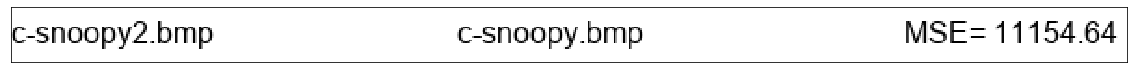

In [35]:
# 印出圖片標頭-1
print_image(imgHeader1)

<Figure size 432x288 with 0 Axes>

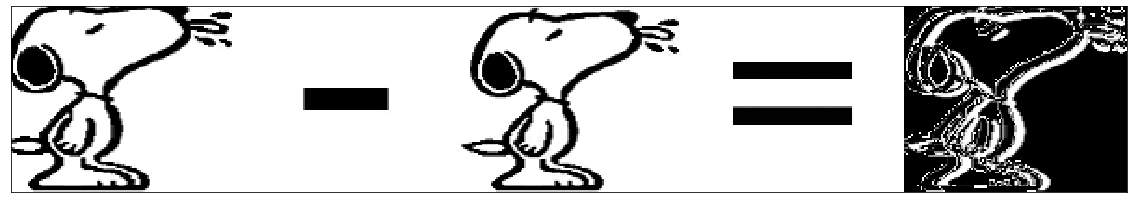

In [36]:
# 印出圖片內容-1
print_image(imgContent1)

<Figure size 432x288 with 0 Axes>

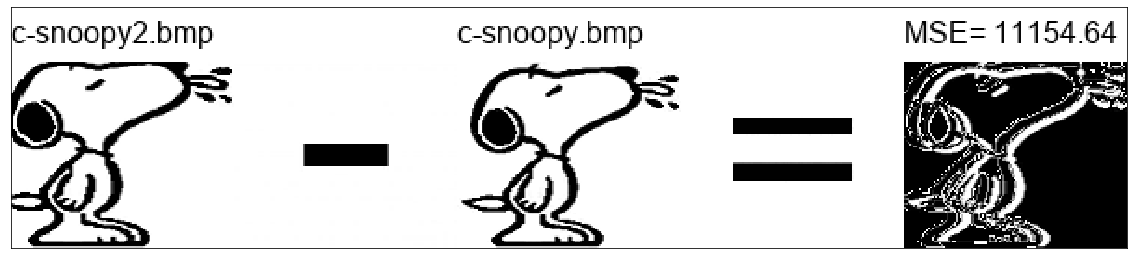

In [37]:
# 印出圖片結果-1
print_image(imgResult1)

### <font color='red'>7.</font> 取得第二組圖片相減的結果

In [38]:
# 顯示 c-snoopy3.bmp 和 原圖c-snoopy.bmp 相減的結果
imgHeader2, imgContent2, imgResult2 = minus_image('c-snoopy3.bmp')

<Figure size 432x288 with 0 Axes>

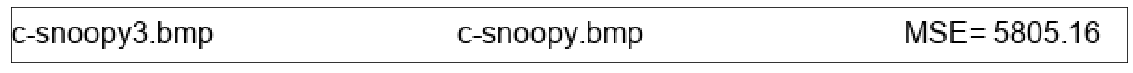

In [39]:
# 印出圖片標頭-2
print_image(imgHeader2)

<Figure size 432x288 with 0 Axes>

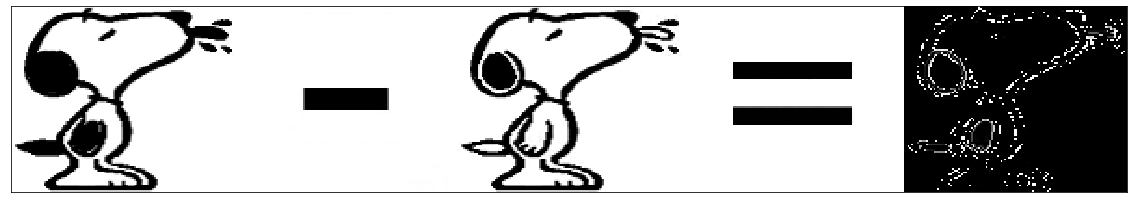

In [40]:
# 印出圖片內容-2
print_image(imgContent2)

<Figure size 432x288 with 0 Axes>

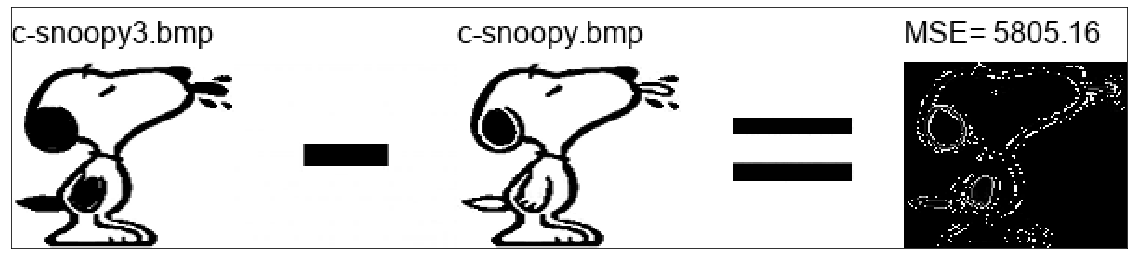

In [41]:
# 印出圖片結果-2
print_image(imgResult2)

### <font color='red'>8.</font> 印出最終比較結果

<Figure size 432x288 with 0 Axes>

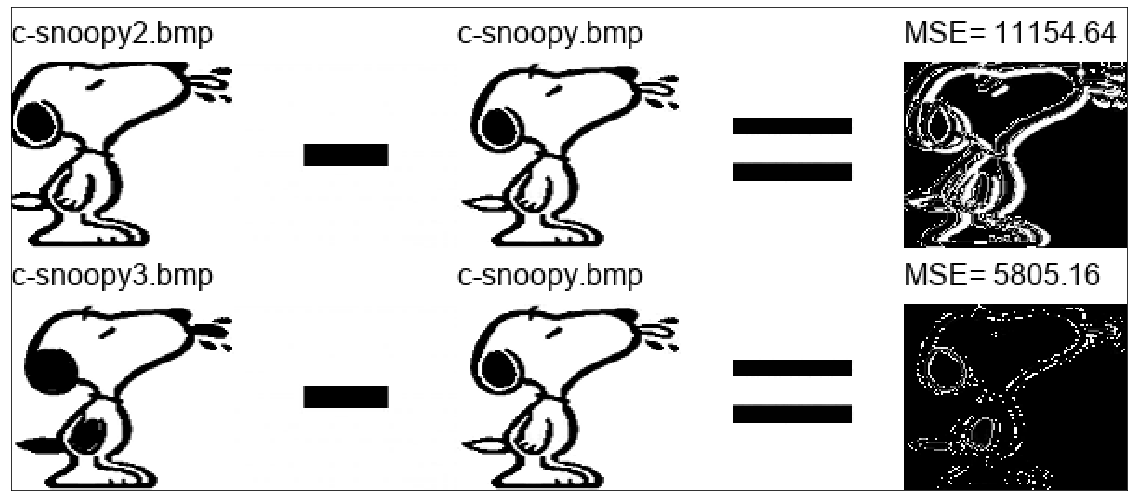

In [42]:
# 印出最終比較結果
print_image(cv2.vconcat((imgResult1, imgResult2)))